In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import scipy.optimize as sp

In [13]:
df = pd.read_csv("test.csv")

In [14]:
df.head()

,Unnamed: 0,0,1,2
0,0,0,0,146
1,1,0,0,154
2,2,0,0,155
3,3,0,0,147
4,4,0,0,156


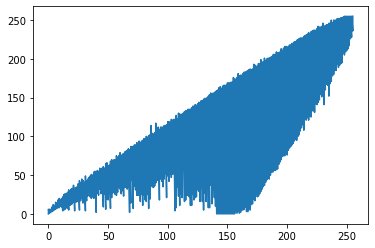

In [15]:
plt.plot(df["0"].values,df["1"].values)

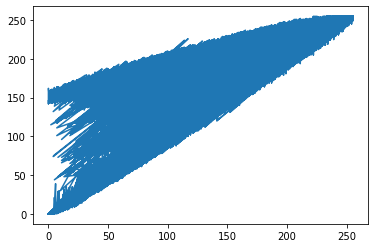

In [19]:
plt.plot(df["1"].values,df["2"].values)

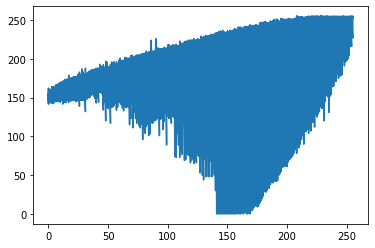

In [20]:
plt.plot(df["0"].values,df["2"].values)

In [23]:
from sklearn import datasets, decomposition
df = df[["0","1","2"]]
pca = decomposition.PCA(n_components=1)
pca.fit(df)

PCA(n_components=1)

In [25]:
pca.explained_variance_ratio_

array([0.73217666])

In [2]:
img = cv2.imread('seismic-1000.png')

In [11]:
s = {}
for i in range(len(img)):
    for j in range(len(img[i])):
        if tuple(img[i][j]) in list(s.keys()):
            s[tuple(img[i][j])] += 1
        else:
            s[tuple(img[i][j])] = 1

KeyboardInterrupt: 

In [12]:
s

{(255, 255, 255): 38518,
 (254, 254, 254): 832955,
 (253, 253, 253): 3806,
 (255, 255, 254): 1439,
 (254, 253, 253): 1142,
 (253, 253, 254): 3064,
 (252, 252, 253): 2334,
 (250, 250, 253): 1791,
 (251, 251, 253): 2735,
 (250, 250, 252): 1507,
 (249, 249, 252): 2155,
 (248, 248, 252): 2329,
 (254, 255, 255): 524,
 (247, 247, 252): 1450,
 (245, 245, 251): 1845,
 (252, 252, 254): 1050,
 (246, 246, 251): 2258,
 (243, 243, 250): 2237,
 (242, 242, 249): 1622,
 (243, 243, 249): 949,
 (246, 246, 250): 516,
 (253, 252, 252): 763,
 (253, 251, 251): 946,
 (252, 250, 250): 529,
 (252, 249, 249): 884,
 (252, 251, 251): 306,
 (253, 250, 250): 790,
 (252, 248, 248): 1020,
 (254, 252, 252): 448,
 (254, 251, 251): 211,
 (252, 249, 248): 220,
 (252, 250, 249): 156,
 (252, 251, 250): 51,
 (253, 252, 251): 145,
 (253, 253, 252): 75,
 (250, 251, 253): 262,
 (249, 250, 252): 159,
 (253, 254, 254): 163,
 (252, 253, 253): 60,
 (251, 246, 246): 1014,
 (250, 244, 244): 834,
 (249, 242, 242): 715,
 (249, 241, 24

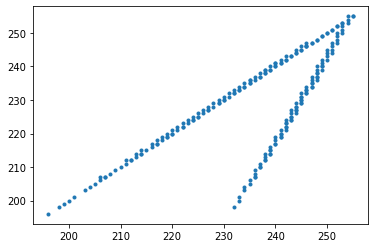

In [27]:
plt.plot([k[0] for k in s.keys() if s[k] > 500], [k[1] for k in s.keys() if s[k] > 500], ".")

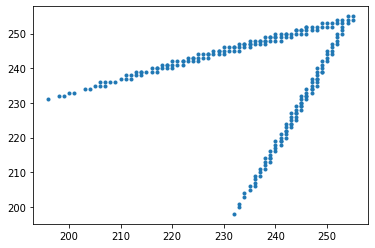

In [28]:
plt.plot([k[0] for k in s.keys() if s[k] > 500], [k[2] for k in s.keys() if s[k] > 500], ".")

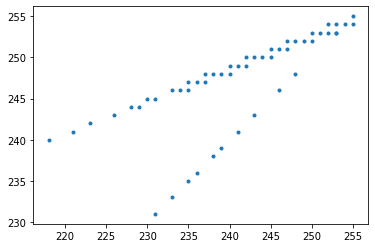

In [24]:
plt.plot([k[1] for k in s.keys() if s[k] > 1000], [k[2] for k in s.keys() if s[k] > 1000], ".")

In [70]:
def myScale(amp):
    if amp < 0:
        return (amp*(255-195)+255, amp*(255-195)+255, amp*(255-230)+255)
    return (255-amp*(255-232),255-amp*(255-199),255-amp*(255-199))

In [1]:
def myRevScale(rgb):
    def cost_function(amp):
        fitted = myScale(amp)
        return (fitted[0] - rgb[0])**2 + (fitted[1] - rgb[1])**2 + (fitted[2] - rgb[2])**2
    opt1 = sp.minimize(cost_function,-1, tol=0.1)
    opt2 = sp.minimize(cost_function,1, tol=0.1)
    if opt1.fun > opt2.fun:
        return opt2.x[0]
    return opt1.x[0]

In [99]:
myRevScale((200,200,230))

-0.9233226911579102

In [83]:
myScale(-1)

(195, 195, 230)

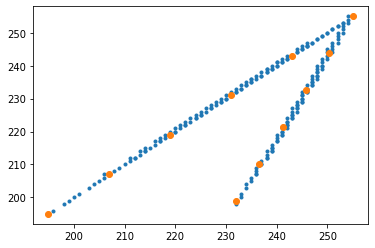

In [71]:
l = list(np.linspace(-1,1,11))
rbg_l = [myScale(x) for x in l]
plt.plot([k[0] for k in s.keys() if s[k] > 500], [k[1] for k in s.keys() if s[k] > 500], ".")
plt.plot([k[0] for k in rbg_l], [k[1] for k in rbg_l], "o")

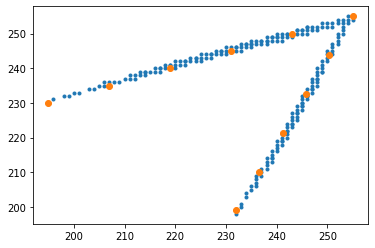

In [72]:
plt.plot([k[0] for k in s.keys() if s[k] > 500], [k[2] for k in s.keys() if s[k] > 500], ".")
plt.plot([k[0] for k in rbg_l], [k[2] for k in rbg_l], "o")

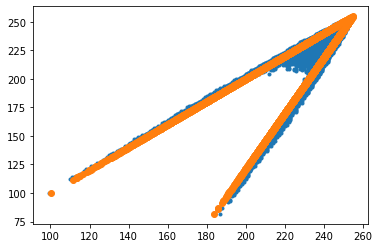

In [106]:
rbg_l = [myScale(myRevScale(x)) for x in s.keys() if s[x] > 50]
plt.plot([k[0] for k in s.keys() if s[k] > 50], [k[1] for k in s.keys() if s[k] > 50], ".")
plt.plot([k[0] for k in rbg_l], [k[1] for k in rbg_l], "o")